In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Corrección: 'plotly' (no 'ploty')
try:
    import plotly.express as px
except ModuleNotFoundError:
    print("Plotly no está instalado. Instala con: pip install plotly")

Plotly no está instalado. Instala con: pip install plotly


In [11]:
ruta = "../data/Reactiva_Peru_Lista_de_empresas_al_30102020.xlsx"
df = pd.read_excel(ruta)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,INFORMACIÓN DE LOS CERTIFICADOS EMITIDOS DEL P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,RAZÓN SOCIAL,RUC/DNI,SECTOR ECONÓMICO,NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO,NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*,MONTO PRÉSTAMO (S/),MONTO COBERTURADO (S/),DEPARTAMENTO
2,1.0,_x001A_USTA SAGRADA SAC,20553879150,HOTELES Y RESTAURANTES,0011 - BANCO BBVA PERU,NaN,482080,457976,LIMA
3,2.0,2L SOLUCIONES S.A.C.,20524693250,"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",0002 - CRÉDITO,NaN,124896,118651.2,LIMA
4,3.0,3P INVERSIONES S.A.C.,20551286348,COMERCIO,0002 - CRÉDITO,NaN,106577,101248.15,LIMA


In [12]:
df.shape

(501303, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501303 entries, 0 to 501302
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  501298 non-null  float64
 1   Unnamed: 1  501301 non-null  object 
 2   Unnamed: 2  501299 non-null  object 
 3   Unnamed: 3  501299 non-null  object 
 4   Unnamed: 4  501299 non-null  object 
 5   Unnamed: 5  9890 non-null    object 
 6   Unnamed: 6  501299 non-null  object 
 7   Unnamed: 7  501299 non-null  object 
 8   Unnamed: 8  501299 non-null  object 
dtypes: float64(1), object(8)
memory usage: 34.4+ MB


In [ ]:
# Guardamos los nombres correctos desde la segunda fila
new_columns = df.iloc[1].tolist()

# Eliminamos las dos primeras filas
df = df.iloc[2:].copy().reset_index(drop=True)

# Asignamos los nuevos encabezados
df.columns = new_columns

# Limpieza opcional de nombres de columnas: quitar espacios, normalizar a snake_case simple
df.columns = (pd.Series(df.columns)
              .astype(str)
              .str.strip()
              .str.replace(r"\s+", "_", regex=True)
              .str.replace(r"[^0-9A-Za-z_]+", "", regex=True))

# Resolver posibles duplicados añadiendo sufijos numéricos
if df.columns.duplicated().any():
    counts = {}
    cols_dedup = []
    for c in df.columns:
        if c in counts:
            counts[c] += 1
            cols_dedup.append(f"{c}_{counts[c]}")
        else:
            counts[c] = 0
            cols_dedup.append(c)
    df.columns = cols_dedup

# Vista rápida para verificar
display(df.head(10))
print('Forma después del ajuste:', df.shape)
print('Columnas:', list(df.columns))

,nan,RAZN_SOCIAL,RUCDNI,SECTOR_ECONMICO,NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO,NOMBRE_DE_2DA_ENTIDAD_OTORGANTE_DEL_CRDITO,MONTO_PRSTAMO_S,MONTO_COBERTURADO_S,DEPARTAMENTO
0,1.0,_x001A_USTA SAGRADA SAC,20553879150,HOTELES Y RESTAURANTES,0011 - BANCO BBVA PERU,NaN,482080,457976,LIMA
1,2.0,2L SOLUCIONES S.A.C.,20524693250,"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",0002 - CRÉDITO,NaN,124896,118651.2,LIMA
2,3.0,3P INVERSIONES S.A.C.,20551286348,COMERCIO,0002 - CRÉDITO,NaN,106577,101248.15,LIMA
3,4.0,A & G MISTI CONSTRUCTORESS.A.C,20542311488,MINERIA,0002 - CRÉDITO,NaN,104066,98862.7,SAN MARTIN
4,5.0,A Y N CALZADOS S.A.C.,20601959217,INDUSTRIA MANUFACTURERA,0002 - CRÉDITO,NaN,90677,86143.15,LIMA
5,6.0,ABRAINO E.I.R.L.,20601644011,COMERCIO,0002 - CRÉDITO,NaN,114650,108917.5,LIMA
6,7.0,AC PROYECTOS GENERALES SOCIEDAD ANONIMA CERRADA,20546964184,INDUSTRIA MANUFACTURERA,0002 - CRÉDITO,NaN,142541,135413.95,LIMA
7,8.0,ACERIAS TEFOLCA SAC,20601806461,COMERCIO,0002 - CRÉDITO,NaN,178796,169856.2,LIMA
8,9.0,ACR IMPORTACIONES GENERALES EIRL,20524657296,COMERCIO,0002 - CRÉDITO,NaN,116876,111032.2,LIMA
9,10.0,AD MY PLAZA S.A.C.,20603720921,COMERCIO,0002 - CRÉDITO,NaN,139910,132914.5,LIMA


Forma después del ajuste: (501301, 9)
Columnas: ['nan', 'RAZN_SOCIAL', 'RUCDNI', 'SECTOR_ECONMICO', 'NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO', 'NOMBRE_DE_2DA_ENTIDAD_OTORGANTE_DEL_CRDITO', 'MONTO_PRSTAMO_S', 'MONTO_COBERTURADO_S', 'DEPARTAMENTO']


# Primer analisis eliminando la columna "NOMBRE_DE_2DA_ENTIDAD_OTORGANTE_DEL_CRDITO"

In [15]:
df.drop('NOMBRE_DE_2DA_ENTIDAD_OTORGANTE_DEL_CRDITO', axis=1, inplace=True)
df = df.drop(df.columns[0], axis=1)

In [16]:
df.head(10)

,RAZN_SOCIAL,RUCDNI,SECTOR_ECONMICO,NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO,MONTO_PRSTAMO_S,MONTO_COBERTURADO_S,DEPARTAMENTO
0,_x001A_USTA SAGRADA SAC,20553879150,HOTELES Y RESTAURANTES,0011 - BANCO BBVA PERU,482080,457976,LIMA
1,2L SOLUCIONES S.A.C.,20524693250,"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",0002 - CRÉDITO,124896,118651.2,LIMA
2,3P INVERSIONES S.A.C.,20551286348,COMERCIO,0002 - CRÉDITO,106577,101248.15,LIMA
3,A & G MISTI CONSTRUCTORESS.A.C,20542311488,MINERIA,0002 - CRÉDITO,104066,98862.7,SAN MARTIN
4,A Y N CALZADOS S.A.C.,20601959217,INDUSTRIA MANUFACTURERA,0002 - CRÉDITO,90677,86143.15,LIMA
5,ABRAINO E.I.R.L.,20601644011,COMERCIO,0002 - CRÉDITO,114650,108917.5,LIMA
6,AC PROYECTOS GENERALES SOCIEDAD ANONIMA CERRADA,20546964184,INDUSTRIA MANUFACTURERA,0002 - CRÉDITO,142541,135413.95,LIMA
7,ACERIAS TEFOLCA SAC,20601806461,COMERCIO,0002 - CRÉDITO,178796,169856.2,LIMA
8,ACR IMPORTACIONES GENERALES EIRL,20524657296,COMERCIO,0002 - CRÉDITO,116876,111032.2,LIMA
9,AD MY PLAZA S.A.C.,20603720921,COMERCIO,0002 - CRÉDITO,139910,132914.5,LIMA


In [18]:
df.describe()

,RAZN_SOCIAL,RUCDNI,SECTOR_ECONMICO,NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO,MONTO_PRSTAMO_S,MONTO_COBERTURADO_S,DEPARTAMENTO
count,501299,501298,501298,501298,501298,501298,501298
unique,500782,501298,14,28,110145,116470,25
top,MAMANI MAMANI FLORA,20603321694,COMERCIO,0049 - MIBANCO,10000,9800,LIMA
freq,4,1,237995,255671,8751,8751,153251


In [19]:
df.shape

(501301, 7)

# Distribución de variables categóricas

1. `NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO`
2. `SECTOR_ECONMICO`
3. `DEPARTAMENTO`


In [ ]:
def plot_categorical_dist(df, column, top_n=15, figsize=(10,5)):
    """Grafica distribución de una columna categórica mostrando Top N y agrupando el resto en 'Otros'."""
    serie = df[column].astype(str).str.strip()
    counts = serie.value_counts(dropna=False)

    # Top + Otros
    top = counts.head(top_n).copy()
    if len(counts) > top_n:
        top.loc['Otros'] = counts.iloc[top_n:].sum()

    total_original = counts.sum()

    plt.figure(figsize=figsize)
    ax = sns.barplot(x=top.index, y=top.values, palette='viridis')
    ax.set_title(f'Distribución: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

    # Anotar porcentaje respecto al total original
    for i, v in enumerate(top.values):
        pct = v / total_original * 100
        ax.text(i, v, f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    resumen = (top.to_frame('Frecuencia')
                 .assign(Porcentaje=lambda d: (d['Frecuencia']/total_original*100).round(2)))
    return resumen

/tmp/ipykernel_9560/1470130183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top.index, y=top.values, palette='viridis')


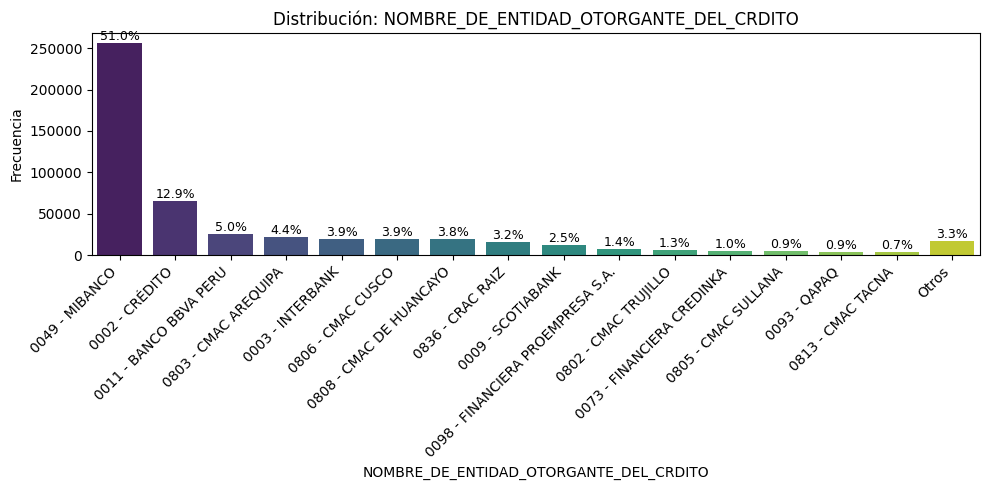

/tmp/ipykernel_9560/1470130183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top.index, y=top.values, palette='viridis')


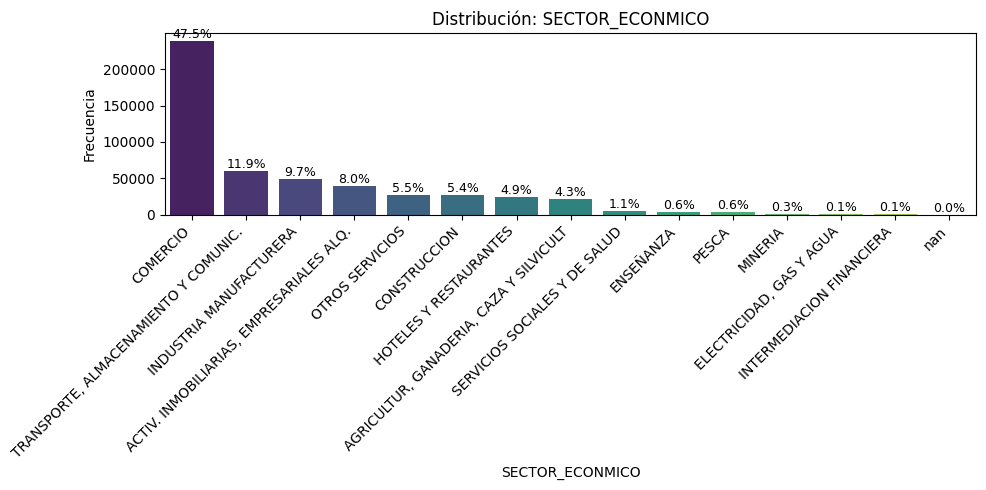

/tmp/ipykernel_9560/1470130183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top.index, y=top.values, palette='viridis')


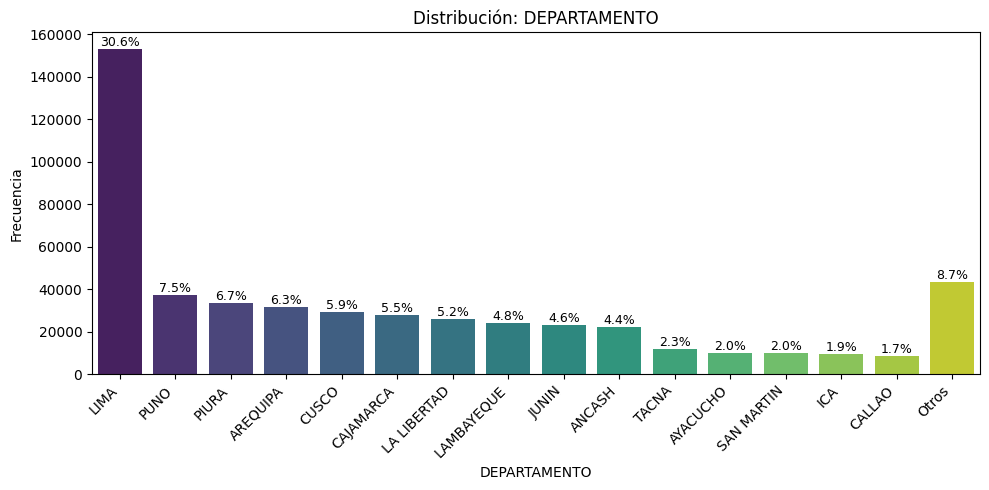

In [ ]:
cols_a_graficar = [
    'NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO',
    'SECTOR_ECONMICO',
    'DEPARTAMENTO'
]

for col in cols_a_graficar:
    if col in df.columns:
        plot_categorical_dist(df, col, top_n=15)
    else:
        print(f"Columna no encontrada en DataFrame: {col}")

# Distribución de variables numéricas
Analizaremos la forma, dispersión y posibles outliers de:

- `MONTO_PRSTAMO_S`
- `MONTO_COBERTURADO_S`

In [26]:
from scipy.stats import skew, kurtosis

def distribucion_numerica(df, column, bins=40, figsize=(12,4), log=False):
    """Genera histograma+KDE, boxplot y tabla de estadísticos para una variable numérica."""
    if column not in df.columns:
        print(f'Columna no encontrada: {column}')
        return
    serie = pd.to_numeric(df[column], errors='coerce').dropna()
    if serie.empty:
        print(f'Sin datos numéricos válidos en {column}')
        return

    fig, axes = plt.subplots(1, 2, figsize=(figsize[0], figsize[1]))

    # Histograma + KDE
    sns.histplot(serie, bins=bins, kde=True, ax=axes[0], log_scale=log, color='steelblue')
    axes[0].set_title(f'Histograma {column}' + (' (log)' if log else ''))
    axes[0].set_xlabel(column)

    # Boxplot
    sns.boxplot(x=serie, ax=axes[1], color='orange')
    axes[1].set_title(f'Boxplot {column}')

    plt.tight_layout()
    plt.show()

    stats = {
        '#': serie.count(),
        'Promedio': serie.mean(),
        'Desviación estándar': serie.std(),
        'mínimo': serie.min(),
        'Cuartil 25': serie.quantile(0.25),
        'mediana': serie.median(),
        'Cuartil 75': serie.quantile(0.75),
        'máximo': serie.max(),
        'Rango intercuartílico': serie.quantile(0.75) - serie.quantile(0.25),
        'Asimetría': skew(serie),
        'Curtosis': kurtosis(serie, fisher=True)
    }
    display(pd.DataFrame(stats, index=[column]))

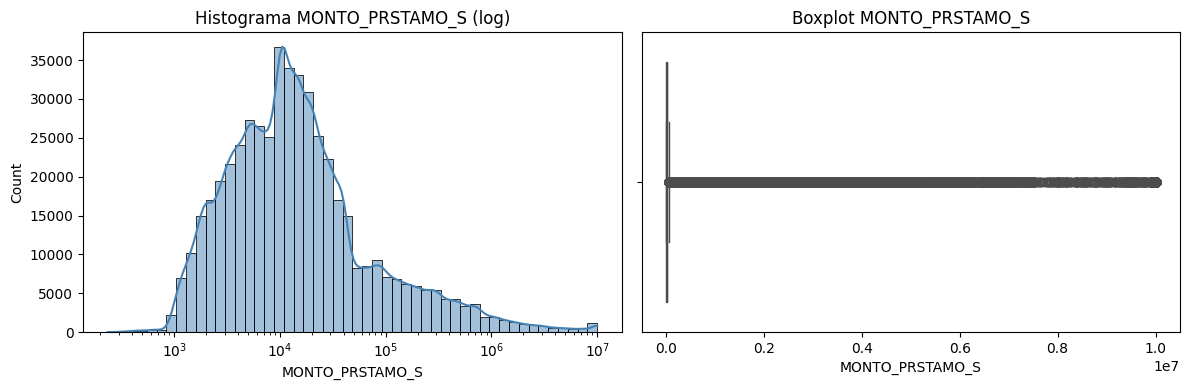

,#,Promedio,Desviación estándar,mínimo,Cuartil 25,mediana,Cuartil 75,máximo,Rango intercuartílico,Asimetría,Curtosis
MONTO_PRSTAMO_S,501298,115427.844032,626026.515767,234.0,4990.0,12000.0,30721.0,10000000.0,25731.0,11.720839,159.449664


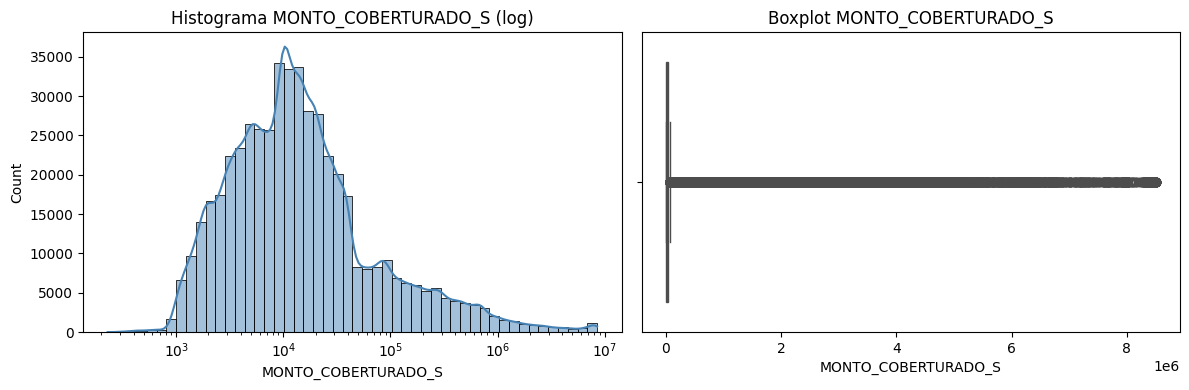

,#,Promedio,Desviación estándar,mínimo,Cuartil 25,mediana,Cuartil 75,máximo,Rango intercuartílico,Asimetría,Curtosis
MONTO_COBERTURADO_S,501298,104047.291265,530342.979453,229.32,4890.2,11760.0,30079.6725,8500000.0,25189.4725,11.040008,141.461019


In [27]:
# Ejecutar análisis para las dos columnas numéricas
cols_numericas = ['MONTO_PRSTAMO_S', 'MONTO_COBERTURADO_S']
resumenes = []
for c in cols_numericas:
    print('='*60)
    resumen = distribucion_numerica(df, c, bins=50, figsize=(12,4), log=True)
    if resumen is not None:
        resumenes.append(resumen)

# oncatenar todos los resúmenes
if resumenes:
    resumen_global = pd.concat(resumenes)
    display(resumen_global)

### Boxplots truncados (sin valores extremos)


In [30]:
def boxplot_truncado(df, column, metodo='percentil', p_low=0.01, p_high=0.99, usar_iqr=False):
    """Muestra boxplot original y truncado para una columna numérica.

    Parametros:
      metodo: 'percentil' (por defecto) - recorta por cuantiles.
      p_low, p_high: límites si metodo='percentil'.
      usar_iqr: si True aplica límites IQR en vez de percentiles.
    """
    if column not in df.columns:
        print(f'Columna no encontrada: {column}')
        return
    serie = pd.to_numeric(df[column], errors='coerce').dropna()
    if serie.empty:
        print(f'Sin datos numéricos válidos en {column}')
        return

    if usar_iqr:
        q1, q3 = serie.quantile([0.25, 0.75])
        iqr = q3 - q1
        low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
        metodo_texto = 'IQR (1.5*IQR)'
    else:
        low, high = serie.quantile(p_low), serie.quantile(p_high)
        metodo_texto = f'Percentiles {int(p_low*100)}%-{int(p_high*100)}%'

    serie_trunc = serie[(serie >= low) & (serie <= high)]

    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.boxplot(x=serie, ax=axes[0], color='lightblue')
    axes[0].set_title(f'Original ({column})')
    sns.boxplot(x=serie_trunc, ax=axes[1], color='salmon')
    axes[1].set_title(f'Truncado {metodo_texto}')
    plt.tight_layout()
    plt.show()

    resumen = pd.DataFrame({
        'count':[serie.count(), serie_trunc.count()],
        'min':[serie.min(), serie_trunc.min()],
        'p25':[serie.quantile(0.25), serie_trunc.quantile(0.25)],
        'median':[serie.median(), serie_trunc.median()],
        'p75':[serie.quantile(0.75), serie_trunc.quantile(0.75)],
        'max':[serie.max(), serie_trunc.max()],
        'IQR':[serie.quantile(0.75)-serie.quantile(0.25), serie_trunc.quantile(0.75)-serie_trunc.quantile(0.25)]
    }, index=['Original','Truncado'])
    print(f'Límites usados: low={low:.2f}, high={high:.2f}')
    display(resumen)
    return resumen


========================= MONTO_PRSTAMO_S (Percentiles 1-99) =========================


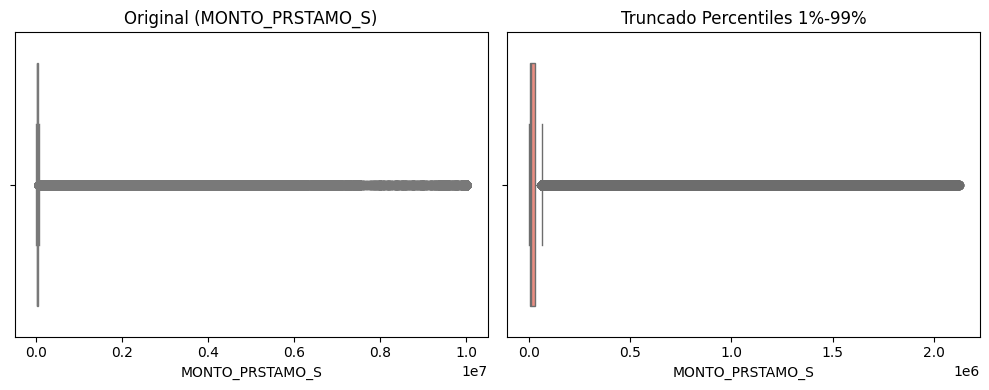

Límites usados: low=1119.97, high=2120000.00


,count,min,p25,median,p75,max,IQR
Original,501298,234.0,4990.0,12000.0,30721.0,10000000.0,25731.0
Truncado,491274,1120.0,5000.0,12000.0,30000.0,2120000.0,25000.0



------------------------- MONTO_PRSTAMO_S (IQR) -------------------------


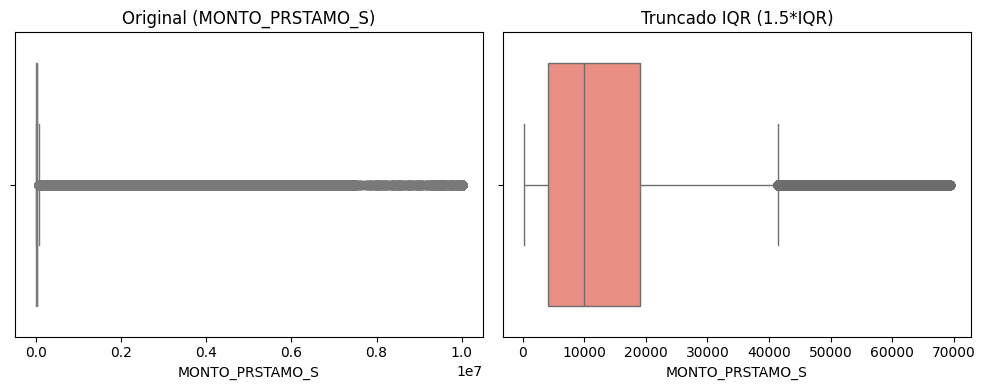

Límites usados: low=-33606.50, high=69317.50


,count,min,p25,median,p75,max,IQR
Original,501298,234.0,4990.0,12000.0,30721.0,10000000.0,25731.0
Truncado,424443,234.0,4156.0,10000.0,19057.5,69315.0,14901.5



========================= MONTO_COBERTURADO_S (Percentiles 1-99) =========================


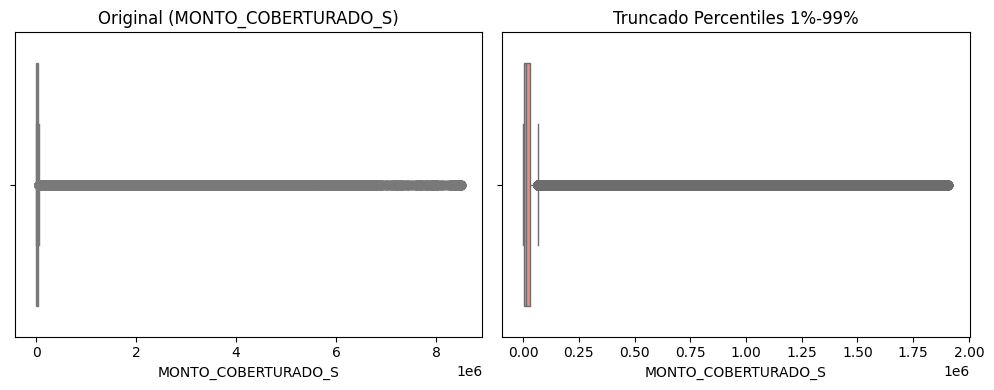

Límites usados: low=1097.57, high=1908000.00


,count,min,p25,median,p75,max,IQR
Original,501298,229.32,4890.2,11760.0,30079.6725,8500000.0,25189.4725
Truncado,491274,1097.60,4900.0,11760.0,29400.0000,1908000.0,24500.0000



------------------------- MONTO_COBERTURADO_S (IQR) -------------------------


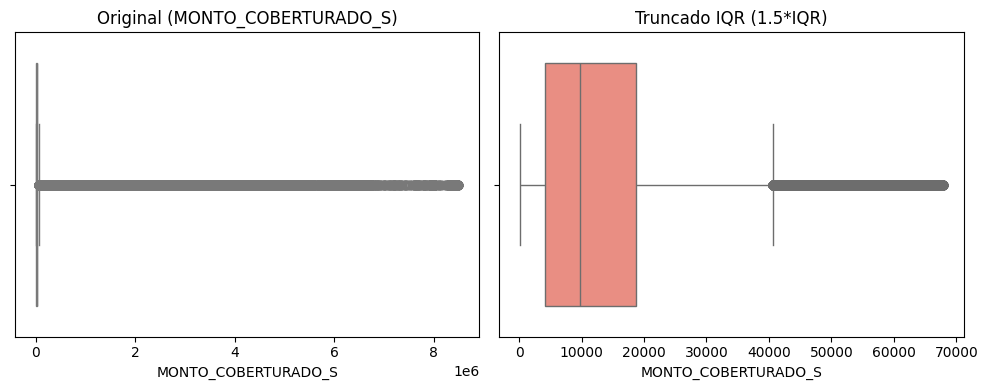

Límites usados: low=-32894.01, high=67863.88


,count,min,p25,median,p75,max,IQR
Original,501298,229.32,4890.20,11760.0,30079.6725,8500000.00,25189.4725
Truncado,424614,229.32,4075.82,9800.0,18704.0350,67858.14,14628.2150


In [31]:
# Aplicar truncado a las variables numéricas
for c in ['MONTO_PRSTAMO_S', 'MONTO_COBERTURADO_S']:
    print('\n' + '='*25 + f' {c} (Percentiles 1-99) ' + '='*25)
    boxplot_truncado(df, c, metodo='percentil', p_low=0.01, p_high=0.99)
    print('\n' + '-'*25 + f' {c} (IQR) ' + '-'*25)
    boxplot_truncado(df, c, usar_iqr=True)

# Analisis de la columna "2DA. ENTIDAD OTORGANTE DEL CRÉDITO"

In [39]:
ruta = "../data/Reactiva_Peru_Lista_de_empresas_al_30102020.xlsx"
df = pd.read_excel(ruta)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,INFORMACIÓN DE LOS CERTIFICADOS EMITIDOS DEL P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,RAZÓN SOCIAL,RUC/DNI,SECTOR ECONÓMICO,NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO,NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*,MONTO PRÉSTAMO (S/),MONTO COBERTURADO (S/),DEPARTAMENTO
2,1.0,_x001A_USTA SAGRADA SAC,20553879150,HOTELES Y RESTAURANTES,0011 - BANCO BBVA PERU,NaN,482080,457976,LIMA
3,2.0,2L SOLUCIONES S.A.C.,20524693250,"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",0002 - CRÉDITO,NaN,124896,118651.2,LIMA
4,3.0,3P INVERSIONES S.A.C.,20551286348,COMERCIO,0002 - CRÉDITO,NaN,106577,101248.15,LIMA


In [40]:
# Guardamos los nombres correctos desde la segunda fila
new_columns = df.iloc[1].tolist()

# Eliminamos las dos primeras filas
df = df.iloc[2:].copy().reset_index(drop=True)

# Asignamos los nuevos encabezados
df.columns = new_columns

# Limpieza opcional de nombres de columnas: quitar espacios, normalizar a snake_case simple
df.columns = (pd.Series(df.columns)
              .astype(str)
              .str.strip()
              .str.replace(r"\s+", "_", regex=True)
              .str.replace(r"[^0-9A-Za-z_]+", "", regex=True))

# Resolver posibles duplicados añadiendo sufijos numéricos
if df.columns.duplicated().any():
    counts = {}
    cols_dedup = []
    for c in df.columns:
        if c in counts:
            counts[c] += 1
            cols_dedup.append(f"{c}_{counts[c]}")
        else:
            counts[c] = 0
            cols_dedup.append(c)
    df.columns = cols_dedup

# Vista rápida para verificar
display(df.head(10))
print('Forma después del ajuste:', df.shape)
print('Columnas:', list(df.columns))

,nan,RAZN_SOCIAL,RUCDNI,SECTOR_ECONMICO,NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO,NOMBRE_DE_2DA_ENTIDAD_OTORGANTE_DEL_CRDITO,MONTO_PRSTAMO_S,MONTO_COBERTURADO_S,DEPARTAMENTO
0,1.0,_x001A_USTA SAGRADA SAC,20553879150,HOTELES Y RESTAURANTES,0011 - BANCO BBVA PERU,NaN,482080,457976,LIMA
1,2.0,2L SOLUCIONES S.A.C.,20524693250,"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",0002 - CRÉDITO,NaN,124896,118651.2,LIMA
2,3.0,3P INVERSIONES S.A.C.,20551286348,COMERCIO,0002 - CRÉDITO,NaN,106577,101248.15,LIMA
3,4.0,A & G MISTI CONSTRUCTORESS.A.C,20542311488,MINERIA,0002 - CRÉDITO,NaN,104066,98862.7,SAN MARTIN
4,5.0,A Y N CALZADOS S.A.C.,20601959217,INDUSTRIA MANUFACTURERA,0002 - CRÉDITO,NaN,90677,86143.15,LIMA
5,6.0,ABRAINO E.I.R.L.,20601644011,COMERCIO,0002 - CRÉDITO,NaN,114650,108917.5,LIMA
6,7.0,AC PROYECTOS GENERALES SOCIEDAD ANONIMA CERRADA,20546964184,INDUSTRIA MANUFACTURERA,0002 - CRÉDITO,NaN,142541,135413.95,LIMA
7,8.0,ACERIAS TEFOLCA SAC,20601806461,COMERCIO,0002 - CRÉDITO,NaN,178796,169856.2,LIMA
8,9.0,ACR IMPORTACIONES GENERALES EIRL,20524657296,COMERCIO,0002 - CRÉDITO,NaN,116876,111032.2,LIMA
9,10.0,AD MY PLAZA S.A.C.,20603720921,COMERCIO,0002 - CRÉDITO,NaN,139910,132914.5,LIMA


Forma después del ajuste: (501301, 9)
Columnas: ['nan', 'RAZN_SOCIAL', 'RUCDNI', 'SECTOR_ECONMICO', 'NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO', 'NOMBRE_DE_2DA_ENTIDAD_OTORGANTE_DEL_CRDITO', 'MONTO_PRSTAMO_S', 'MONTO_COBERTURADO_S', 'DEPARTAMENTO']


In [41]:
df = df.drop(df.columns[0], axis=1)

In [42]:
# Filtrar filas donde la columna 'NOMBRE_DE_2DA_ENTIDAD_OTORGANTE_DEL_CRDITO' no es nula ni vacía
col_objetivo = 'NOMBRE_DE_2DA_ENTIDAD_OTORGANTE_DEL_CRDITO'
if col_objetivo in df.columns:
    filas_antes = len(df)
    df = df[df[col_objetivo].notna() & df[col_objetivo].astype(str).str.strip().ne('')].copy()
    print(f"Filas antes: {filas_antes} | Filas después: {len(df)} | Eliminadas: {filas_antes - len(df)}")
    print("Valores únicos (top 10):")
    display(df[col_objetivo].value_counts().head(10))
else:
    print(f"La columna '{col_objetivo}' no existe en el DataFrame actual. Revisa el proceso de limpieza.")

Filas antes: 501301 | Filas después: 9889 | Eliminadas: 491412
Valores únicos (top 10):


NOMBRE_DE_2DA_ENTIDAD_OTORGANTE_DEL_CRDITO
0011 - BANCO BBVA PERU           4259
0003 - INTERBANK                 2311
0009 - SCOTIABANK                2301
0002 - CRÉDITO                    670
0805 - CMAC SULLANA                53
0806 - CMAC CUSCO                  52
0801 - CMAC PIURA                  48
0043 - FINANCIERA CREDISCOTIA      46
0802 - CMAC TRUJILLO               44
0023 - COMERCIO                    30
Name: count, dtype: int64

In [45]:
# Tablas breves de distribución (categóricas) y resumen (numéricas) sobre df filtrado
cat_cols = ['NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO','SECTOR_ECONMICO','DEPARTAMENTO']
num_cols = ['MONTO_PRSTAMO_S','MONTO_COBERTURADO_S']

for c in cat_cols:
    if c in df.columns:
        vc = df[c].astype(str).str.strip().value_counts()
        tabla = vc.to_frame('Frecuencia')
        tabla['%'] = (tabla['Frecuencia']/tabla['Frecuencia'].sum()*100).round(2)
        print(f"\n=== {c} (Top 15) ===")
        display(tabla.head(15))

num_exist = [c for c in num_cols if c in df.columns]
if num_exist:
    num_df = df[num_exist].apply(pd.to_numeric, errors='coerce')
    resumen = num_df.describe().T[['count','mean','std','min','25%','50%','75%','max']]
    resumen['skew'] = num_df.skew()
    resumen['kurtosis'] = num_df.kurtosis()
    print("\n=== Resumen numéricas ===")
    display(resumen)


=== NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO (Top 15) ===


,Frecuencia,%
NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO,,
0002 - CRÉDITO,6593,66.67
0049 - MIBANCO,947,9.58
0806 - CMAC CUSCO,601,6.08
0011 - BANCO BBVA PERU,376,3.80
0035 - BANCO PICHINCHA,340,3.44
0009 - SCOTIABANK,261,2.64
0003 - INTERBANK,190,1.92
0038 - INTERAMERICANO,149,1.51
0802 - CMAC TRUJILLO,122,1.23



=== SECTOR_ECONMICO (Top 15) ===


,Frecuencia,%
SECTOR_ECONMICO,,
COMERCIO,4590,46.42
INDUSTRIA MANUFACTURERA,1351,13.66
"TRANSPORTE, ALMACENAMIENTO Y COMUNIC.",1252,12.66
"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",1009,10.20
OTROS SERVICIOS,705,7.13
CONSTRUCCION,271,2.74
HOTELES Y RESTAURANTES,264,2.67
"AGRICULTUR, GANADERIA, CAZA Y SILVICULT",138,1.40
SERVICIOS SOCIALES Y DE SALUD,122,1.23



=== DEPARTAMENTO (Top 15) ===


,Frecuencia,%
DEPARTAMENTO,,
LIMA,5216,52.75
AREQUIPA,621,6.28
LA LIBERTAD,573,5.79
CUSCO,445,4.50
JUNIN,318,3.22
LAMBAYEQUE,281,2.84
CALLAO,247,2.50
PIURA,234,2.37
CAJAMARCA,230,2.33



=== Resumen numéricas ===


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
MONTO_PRSTAMO_S,9889.0,992626.351761,1.863597e+06,5487.00,104762.00,272466.0,805788.3,10000000.0,3.079356,9.657879
MONTO_COBERTURADO_S,9889.0,887159.677440,1.605728e+06,5377.26,99650.25,258842.7,735022.5,8500000.0,2.919052,8.369087


In [43]:
df.shape

(9889, 8)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9889 entries, 432 to 501038
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RAZN_SOCIAL                                 9889 non-null   object
 1   RUCDNI                                      9889 non-null   object
 2   SECTOR_ECONMICO                             9889 non-null   object
 3   NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO      9889 non-null   object
 4   NOMBRE_DE_2DA_ENTIDAD_OTORGANTE_DEL_CRDITO  9889 non-null   object
 5   MONTO_PRSTAMO_S                             9889 non-null   object
 6   MONTO_COBERTURADO_S                         9889 non-null   object
 7   DEPARTAMENTO                                9889 non-null   object
dtypes: object(8)
memory usage: 695.3+ KB


/tmp/ipykernel_9560/1792320314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.index, y=vc.values, palette='viridis')


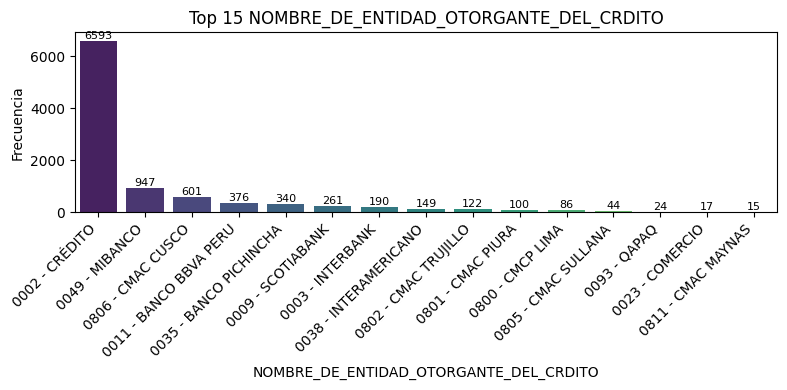

/tmp/ipykernel_9560/1792320314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.index, y=vc.values, palette='viridis')


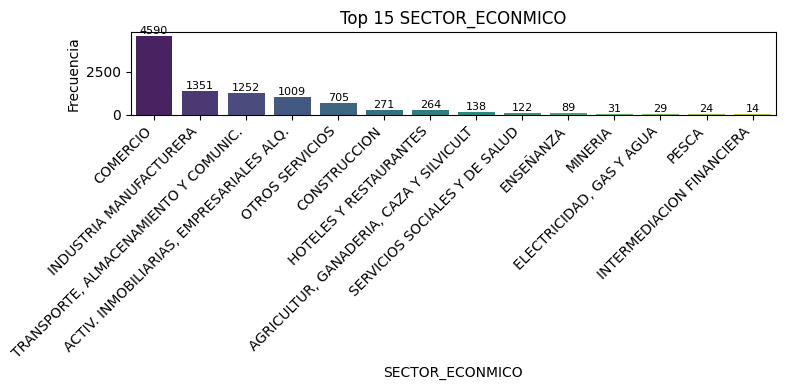

/tmp/ipykernel_9560/1792320314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.index, y=vc.values, palette='viridis')


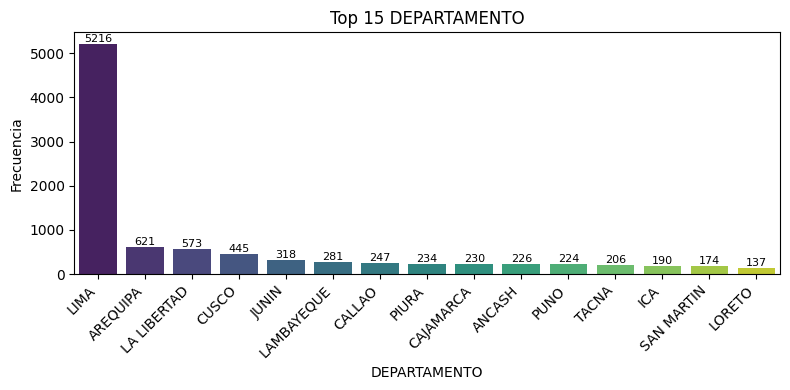

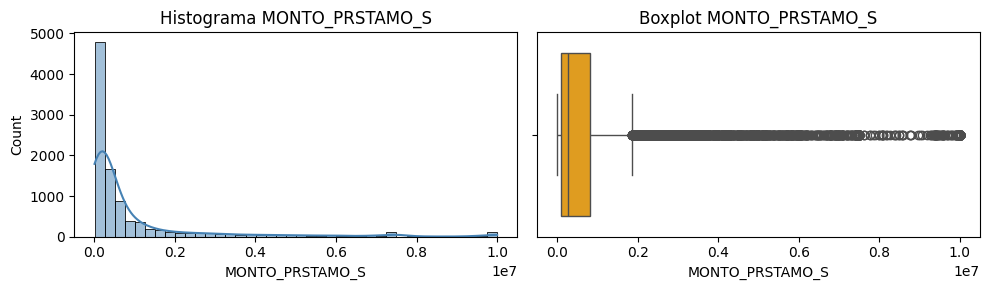

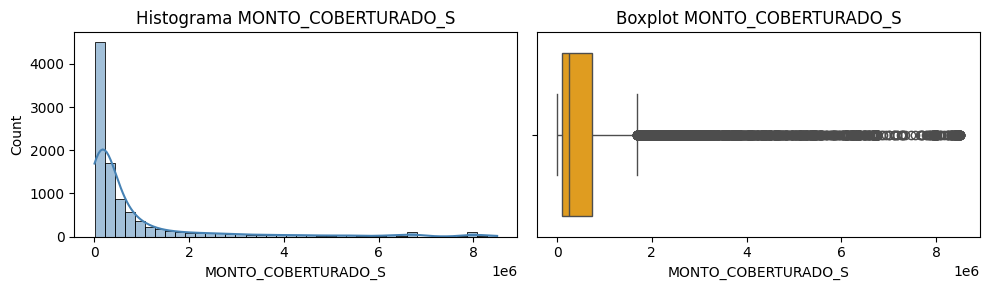

In [46]:
# Gráficos de distribución (categóricas y numéricas) sobre df filtrado
cat_cols = ['NOMBRE_DE_ENTIDAD_OTORGANTE_DEL_CRDITO','SECTOR_ECONMICO','DEPARTAMENTO']
num_cols = ['MONTO_PRSTAMO_S','MONTO_COBERTURADO_S']

# Categóricas
for c in cat_cols:
    if c in df.columns:
        vc = df[c].astype(str).str.strip().value_counts().head(15)
        plt.figure(figsize=(8,4))
        sns.barplot(x=vc.index, y=vc.values, palette='viridis')
        plt.title(f'Top 15 {c}')
        plt.ylabel('Frecuencia')
        plt.xlabel(c)
        plt.xticks(rotation=45, ha='right')
        for i,v in enumerate(vc.values):
            plt.text(i, v, f'{v}', ha='center', va='bottom', fontsize=8)
        plt.tight_layout()
        plt.show()

# Numéricas
for c in num_cols:
    if c in df.columns:
        serie = pd.to_numeric(df[c], errors='coerce').dropna()
        if serie.empty:
            continue
        fig, axes = plt.subplots(1,2, figsize=(10,3))
        sns.histplot(serie, bins=40, kde=True, ax=axes[0], color='steelblue')
        axes[0].set_title(f'Histograma {c}')
        sns.boxplot(x=serie, ax=axes[1], color='orange')
        axes[1].set_title(f'Boxplot {c}')
        plt.tight_layout()
        plt.show()

## Mapa de concentración por Departamento
Visualización geográfica de la distribución de registros por `DEPARTAMENTO`.

Método:
1. Normalizamos nombres de departamentos para evitar inconsistencias (mayúsculas/acentos).
2. Calculamos la frecuencia absoluta y el porcentaje.
3. Generamos un mapa de burbujas sobre el centro aproximado de cada departamento.

Nota: Para una versión choropleth (polígonos) haría falta un archivo GeoJSON de Perú por departamentos. Aquí usamos coordenadas aproximadas de centroides.

In [53]:
# Mapa de burbujas por departamento (frecuencia de registros)
try:
    import plotly.express as px
except ImportError:
    print("Plotly no está instalado. Instálalo con: pip install plotly")
    raise

if 'DEPARTAMENTO' not in df.columns:
    print("Columna 'DEPARTAMENTO' no encontrada en el DataFrame.")
else:
    # Diccionario aproximado de centroides (lat, lon) por departamento (fuente: referencias públicas, simplificado)
    centroides = {
        'AMAZONAS': (-5.0, -78.0), 'ANCASH': (-9.5, -77.6), 'APURIMAC': (-14.0, -72.9),
        'AREQUIPA': (-16.4, -71.5), 'AYACUCHO': (-13.9, -74.2), 'CAJAMARCA': (-7.2, -78.5),
        'CUSCO': (-13.5, -71.9), 'HUANCAVELICA': (-12.8, -74.9), 'HUANUCO': (-9.9, -76.2),
        'ICA': (-14.1, -75.7), 'JUNIN': (-11.9, -75.2), 'LA LIBERTAD': (-8.1, -78.9),
        'LAMBAYEQUE': (-6.6, -79.9), 'LIMA': (-12.0, -77.0), 'LORETO': (-4.1, -73.5),
        'MADRE DE DIOS': (-12.6, -69.2), 'MOQUEGUA': (-17.0, -70.8), 'PASCO': (-10.7, -75.3),
        'PIURA': (-5.2, -80.6), 'PUNO': (-15.1, -70.0), 'SAN MARTIN': (-7.0, -76.8),
        'TACNA': (-18.0, -70.3), 'TUMBES': (-3.6, -80.5), 'UCAYALI': (-8.9, -74.5)
    }

    # Preparar datos
    dep_norm = df['DEPARTAMENTO'].astype(str).str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.strip()
    freq = dep_norm.value_counts().rename('Frecuencia').reset_index().rename(columns={'index':'DEPARTAMENTO'})
    total = freq['Frecuencia'].sum()
    freq['Porcentaje'] = (freq['Frecuencia']/total*100).round(2)

    # Agregar coordenadas
    freq['lat'] = freq['DEPARTAMENTO'].map(lambda x: centroides.get(x, (None, None))[0])
    freq['lon'] = freq['DEPARTAMENTO'].map(lambda x: centroides.get(x, (None, None))[1])
    missing_coords = freq[freq['lat'].isna()]
    if not missing_coords.empty:
        print('Departamentos sin coordenadas (no se mostrarán):', missing_coords['DEPARTAMENTO'].tolist())
        freq = freq.dropna(subset=['lat','lon'])

    fig = px.scatter_mapbox(
        freq,
        lat='lat', lon='lon',
        size='Frecuencia',
        size_max=40,
        color='Frecuencia',
        hover_name='DEPARTAMENTO',
        hover_data={'Frecuencia':True,'Porcentaje':True,'lat':False,'lon':False},
        zoom=4,
        color_continuous_scale='Viridis'
    )
    fig.update_layout(
        title='Concentración de registros por Departamento',
        mapbox_style='carto-positron',
        margin=dict(l=10,r=10,t=40,b=10)
    )

    # Intentar mostrar, si falta nbformat guardar HTML
    try:
        import nbformat  # verificar disponibilidad
        fig.show()
    except Exception as e:
        if 'nbformat' in str(e).lower():
            print('nbformat no disponible. Guardando mapa en mapa_departamentos.html')
            fig.write_html('mapa_departamentos.html')
            print('Abra el archivo mapa_departamentos.html en un navegador. Instale nbformat con: pip install nbformat')
        else:
            raise

    display(freq.head(10))

Departamentos sin coordenadas (no se mostrarán): ['CALLAO']
nbformat no disponible. Guardando mapa en mapa_departamentos.html
Abra el archivo mapa_departamentos.html en un navegador. Instale nbformat con: pip install nbformat


/tmp/ipykernel_9560/1018547747.py:37: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



,DEPARTAMENTO,Frecuencia,Porcentaje,lat,lon
0,LIMA,5216,52.75,-12.0,-77.0
1,AREQUIPA,621,6.28,-16.4,-71.5
2,LA LIBERTAD,573,5.79,-8.1,-78.9
3,CUSCO,445,4.50,-13.5,-71.9
4,JUNIN,318,3.22,-11.9,-75.2
5,LAMBAYEQUE,281,2.84,-6.6,-79.9
7,PIURA,234,2.37,-5.2,-80.6
8,CAJAMARCA,230,2.33,-7.2,-78.5
9,ANCASH,226,2.29,-9.5,-77.6
10,PUNO,224,2.27,-15.1,-70.0
